In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<li>1 https://github.com/tuna-date/Face-Recognition-with-InsightFace</li>

<li>2 https://github.com/tuna-date/Face-Recognition-with-InsightFace/blob/master/src/softmax.py</li>

<hr>

<a href="https://github.com/tuna-date/Face-Recognition-with-InsightFace/blob/master/src/train_softmax.py"><h3>https://github.com/tuna-date/Face-Recognition-with-InsightFace/blob/master/src/train_softmax.py</h3></a>

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
import argparse
import pickle

In [13]:
embeddings         = "/content/drive/MyDrive/coconut/embeddings_small_datasets.pickle"
model              = "/content/drive/MyDrive/coconut/outputs/my_model.5"
label_encoder_path = "/content/drive/MyDrive/coconut/outputs/le.pickle"

In [4]:
with open(embeddings,"rb") as f:
    data = pickle.load(f)
data

{'embeddings': [array([-3.14872354e-01, -4.27063465e-01,  5.22802234e-01,  5.14245212e-01,
         -4.13114160e-01, -4.71814930e-01, -4.64256942e-01, -2.52645075e-01,
         -4.69752908e-01,  5.04767418e-01,  2.10747927e-01,  5.33535838e-01,
         -6.59637570e-01,  9.86711010e-02, -7.71820545e-01,  3.69555384e-01,
          2.80338734e-01, -3.36396486e-01, -9.90020558e-02, -4.32185084e-03,
         -3.20111364e-01,  1.20543456e+00,  6.23659194e-01, -2.82927901e-01,
         -4.05641556e-01,  5.57939947e-01, -3.28308403e-01, -4.65822697e-01,
         -4.60866749e-01, -1.76500976e-02,  5.54599352e-02, -1.40793115e-01,
          7.50216246e-01,  6.39490366e-01, -9.70703661e-01, -7.56544471e-02,
          2.37489015e-01,  5.63965678e-01, -1.48624510e-01,  3.97396922e-01,
         -1.59988940e-01,  8.87625992e-01,  1.09974131e-01, -3.69868308e-01,
         -4.19710129e-02, -1.88776225e-01, -4.66654181e-01, -1.11984611e-02,
         -7.75128901e-01, -2.97193468e-01,  2.95513332e-01, -6

In [5]:
# Encode the labels
le = LabelEncoder()
labels = le.fit_transform(data["names"])     # convert name -> number 0,1,2,3,4,....
print(labels)
num_classes = len(np.unique(labels))         # How many people
labels = labels.reshape(-1,1)                # เปลี่ยน มิติ ของข้อมูล

one_hot_encoder = OneHotEncoder(sparse = False)  # ทำให้เป็น One hot
labels = one_hot_encoder.fit_transform(labels)   # ทำให้เป็น One hot
labels                                           # ทำให้เป็น One hot

[2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [6]:
embeddings = np.array(data["embeddings"])          # convert to numpy metrix with value 0-1
embeddings

array([[-0.31487235, -0.42706347,  0.52280223, ...,  0.42501712,
         0.22862259, -0.07920823],
       [-1.2585095 , -1.1850462 ,  0.41342998, ...,  0.17650986,
         0.2679866 , -0.22779262],
       [-0.9385955 ,  1.4539188 ,  1.1127303 , ...,  0.34126338,
         0.5396729 ,  0.31485635],
       ...,
       [-0.6825372 , -1.0840834 , -0.5870894 , ..., -1.1930914 ,
        -0.4023547 , -0.66443795],
       [-0.70941514, -0.91481614, -0.8934776 , ..., -2.0965405 ,
        -0.8465432 , -0.19612016],
       [-1.5845876 , -1.7543993 ,  0.24790122, ..., -1.6266834 ,
        -1.3699839 , -1.6348867 ]], dtype=float32)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
import keras

class SoftMax():
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes
    def build(self):
        model = Sequential()
        model.add(Input(shape=self.input_shape))
        model.add(Dense(1024, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1024, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(self.num_classes, activation='softmax'))

        optimizer = Adam(learning_rate=0.001)
        model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

        return model  # Ensure the model is returned


In [8]:
# Check shapes of embeddings and labels
print("Embeddings shape:", embeddings.shape)  # Should print (6, 512)
print("Labels shape:", labels.shape)          # Should print (6, 3)

BATCH_SIZE = 32
EPOCHS = 20
input_shape = embeddings.shape[1]    # Data shape is (6,512) There are 6 image with 512 Embedding vector
print(input_shape)

Embeddings shape: (65, 512)
Labels shape: (65, 3)
512


In [9]:
softmax = SoftMax(input_shape=(input_shape,), num_classes=num_classes)
model = softmax.build()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,577,987 (6.02 MB)

 Trainable params: 1,577,987 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# # Fit the model
# model.fit(embeddings, labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 583ms/step - accuracy: 0.5382 - loss: 0.8003
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9768 - loss: 0.0562      
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9612 - loss: 0.0662 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0041     
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0018     
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.6539e-05 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.8099e-04 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.8297e-05 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.5721e-05 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.8902e-05 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.1495e-05 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

In [11]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pickle

# Create KFold with 5 splits
cv = KFold(n_splits=5, random_state=42, shuffle=True)
history = {'acc': [], 'val_acc': [], 'loss': [], 'val_loss': []}

# Train model with KFold
for train_idx, valid_idx in cv.split(embeddings):
    X_train, X_val = embeddings[train_idx], embeddings[valid_idx]
    y_train, y_val = labels[train_idx], labels[valid_idx]

    # Reinitialize the model for each fold
    softmax = SoftMax(input_shape=(input_shape,), num_classes=num_classes)
    model = softmax.build()

    # Train the model
    his = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=(X_val, y_val))

    # Append the history for accuracy and loss
    history['acc'] += his.history['accuracy']  # Updated to 'accuracy' key
    history['val_acc'] += his.history['val_accuracy']  # Updated to 'val_accuracy'
    history['loss'] += his.history['loss']
    history['val_loss'] += his.history['val_loss']

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.4736 - loss: 1.0437 - val_accuracy: 0.9231 - val_loss: 0.3086
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9768 - loss: 0.0855 - val_accuracy: 0.9231 - val_loss: 0.3419
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9872 - loss: 0.0529 - val_accuracy: 0.9231 - val_loss: 0.3156
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9872 - loss: 0.0307 - val_accuracy: 0.9231 - val_loss: 0.2262
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9768 - loss: 0.0492 - val_accuracy: 0.9231 - val_loss: 0.1147
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 0.0479
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0148 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 8.1985e-04 - val_accuracy: 1.0000 - val_loss: 0.003

In [16]:
model

'/content/drive/MyDrive/coconut/outputs/my_model.5'

In [17]:
# Correctly save the model to a file
model.save("/content/drive/MyDrive/coconut/outputs/my_model.h5")  # Save the model with .h5 extension

# Save the label encoder
with open(label_encoder_path, "wb") as f:
    pickle.dump(le, f)

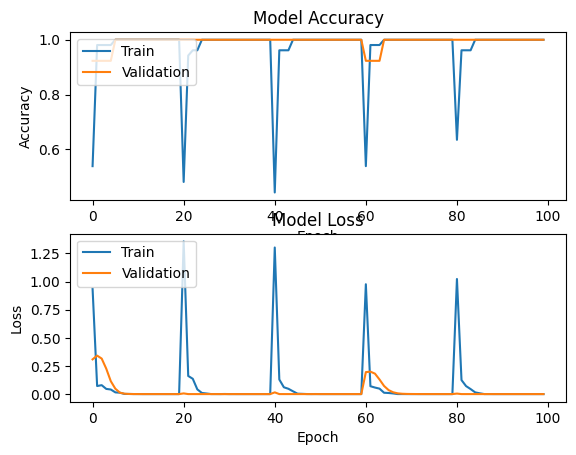

In [19]:
# Plot training history for accuracy and loss
plt.figure(1)

# Summary history for accuracy
plt.subplot(211)
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summary history for loss
plt.subplot(212)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the accuracy and loss plot
plt.savefig('/content/drive/MyDrive/coconut/outputs/accuracy_loss.png')
plt.show()